In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
### Import file 1
gajhq_filepath = r"C:\Users\TyHow\MinersAI Dropbox\Science\Geo Data\Saudi Arabia\Jabal Al Hasir\GA  GAJHQ   Jabal al Hasir Data.xlsx"
gajhq_raw_data = pd.read_excel(gajhq_filepath, sheet_name="Jabal al Hasir Database")
gajhq_raw_data.head(5)

,Jabal al Hasir Quadrangle Database,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,Analytical Results of a Reconnaissance Geochem...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Samples Collected:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Reported : 05/03/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Elements,SiO2,Al2O3,Fe2O3,TiO2,CaO,MgO,Na2O,...,Tb,Th,Tm,U,V,W,Y,Yb,Zn,Zr


In [3]:
### Set custom headers, drop header rows, and reset index
gajhq_columns_part1 = gajhq_raw_data.iloc[6, 0:3].tolist()
gajhq_columns_part2 = gajhq_raw_data.iloc[4, 3:].tolist()

gajhq_columns = gajhq_columns_part1 + gajhq_columns_part2

print("Number of columns in part1:", len(gajhq_columns_part1))
print('columns1 =', gajhq_columns_part1)
print("Number of columns in part2:", len(gajhq_columns_part2))
print('columns2 =', gajhq_columns_part2)
print("Total columns in data:", gajhq_raw_data.shape[1])

gajhq_data = gajhq_raw_data.copy()
gajhq_data.columns = gajhq_columns
gajhq_data.columns = gajhq_data.columns.str.strip()
gajhq_data = gajhq_data.iloc[7:].reset_index(drop=True)

Number of columns in part1: 3
columns1 = ['Sample No.', 'LONG', 'LAT']
Number of columns in part2: 56
columns2 = ['SiO2', 'Al2O3', 'Fe2O3', 'TiO2', 'CaO', 'MgO', 'Na2O', 'K2O', 'MnO', 'SO3', 'P2O5', 'LOI ', 'Au', 'Ag ', 'As ', 'Ba ', 'Be ', 'Bi ', 'Cd ', 'Ce ', 'Co ', 'Cr ', 'Cu ', 'Dy ', 'Er ', 'Eu', 'Ga', 'Gd', 'Ge ', 'Hf ', 'Ho', 'La ', 'Li ', 'Lu ', 'Mo ', 'Nb ', 'Nd ', 'Ni ', 'Pb ', 'Pr ', 'Sb ', 'Sc ', 'Sm ', 'Sn ', 'Sr ', 'Ta', 'Tb ', 'Th', 'Tm ', 'U ', 'V ', 'W', 'Y ', 'Yb ', 'Zn', 'Zr ']
Total columns in data: 59


In [4]:
### Clean data

# Isolate DLs
gajhq_numerical_row = pd.to_numeric(gajhq_raw_data.iloc[5], errors="coerce").fillna(
    0
) + pd.to_numeric(gajhq_raw_data.iloc[6], errors="coerce").fillna(0)

gajhq_DLs = gajhq_numerical_row.to_numpy()
# print("GAJHQ DLs:", gajhq_DLs)

# Replace "<" values with 1/3 of the DL value
for col_index in range(3, gajhq_data.shape[1]):
    dl_value = gajhq_DLs[col_index]

    gajhq_data.iloc[:, col_index] = gajhq_data.iloc[:, col_index].replace(
        r"<.*", 0.333333 * dl_value, regex=True
    )
    # print(f'replaced <DL values in column {col_index} with {dl_value * 0.333333}')


# Identify columns labeled as '%'
gajhq_labels = gajhq_raw_data.iloc[5].astype(str).fillna("") + gajhq_raw_data.iloc[
    6
].astype(str).fillna("")

gajhq_labels = gajhq_labels.str.strip()

percent_col_indices = gajhq_labels[gajhq_labels.str.contains("%", na=False)].index
percent_numerical_indices = [
    gajhq_raw_data.columns.get_loc(col) for col in percent_col_indices
]

# Convert % to ppm
gajhq_data.iloc[:, percent_numerical_indices] = (
    gajhq_data.iloc[:, percent_numerical_indices] * 10000
)

#Drop empty columns
gajhq_data = gajhq_data.loc[:, gajhq_data.nunique() > 1]

C:\Users\TyHow\AppData\Local\Temp\ipykernel_30492\3014912270.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gajhq_data.iloc[:, col_index] = gajhq_data.iloc[:, col_index].replace(


Statistics:

Average correlation: 0.1421273344648178
Max correlation: 1.0
Min correlation: -0.809665348392544


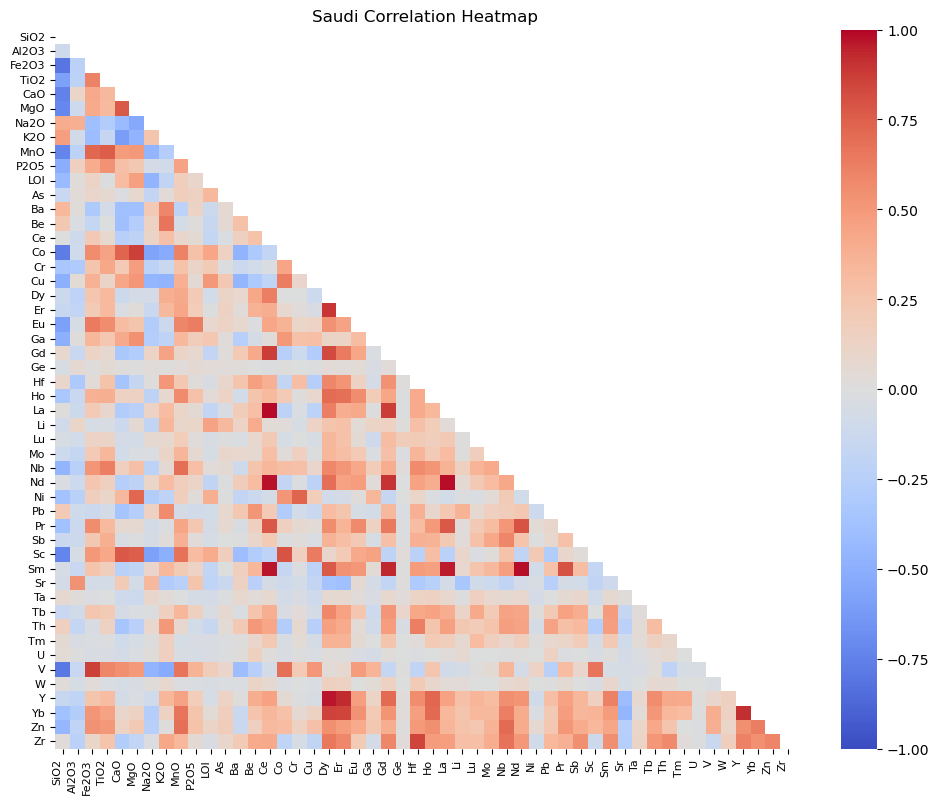

In [48]:
# Corr plot
gajhq_corr = gajhq_data.iloc[:, 3:].corr()

print("Statistics:\n")
print("Average correlation:", gajhq_corr.stack().mean())
print("Max correlation:", gajhq_corr.stack().max())
print("Min correlation:", gajhq_corr.stack().min())

# Create a mask for the upper triangle
gajhq_mask = np.triu(np.ones_like(gajhq_corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    gajhq_corr,
    mask=gajhq_mask,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
)

# Explicitly set tick positions and labels
tick_positions = np.arange(0.5, len(gajhq_corr))
plt.xticks(
    ticks=tick_positions,
    labels=gajhq_corr.columns,
    rotation=90,
    fontsize=8,
    ha="right",
)
plt.yticks(
    ticks=tick_positions,
    labels=gajhq_corr.index,
    rotation=0,
    fontsize=8,
)

plt.tight_layout()
plt.title("Saudi Correlation Heatmap")
plt.show()

In [24]:
### PCA

# Omit non-numeric columns
gajhq_data_pca = gajhq_data.copy()
gajhq_data_pca = gajhq_data_pca.iloc[:, 3:]

scaler = StandardScaler()
gajhq_data_scaled = scaler.fit_transform(gajhq_data_pca)

# Perform PCA
pca = PCA()
gajhq_pca_results = pca.fit_transform(gajhq_data_scaled)

# Explained variance
gajhq_explained_variance = pca.explained_variance_ratio_
#print("Explained Variance Ratios:", gajhq_explained_variance)

# PCA results as a DataFrame (optional)
pca_df = pd.DataFrame(
    gajhq_pca_results, columns=[f"PC{i+1}" for i in range(len(gajhq_explained_variance))]
)

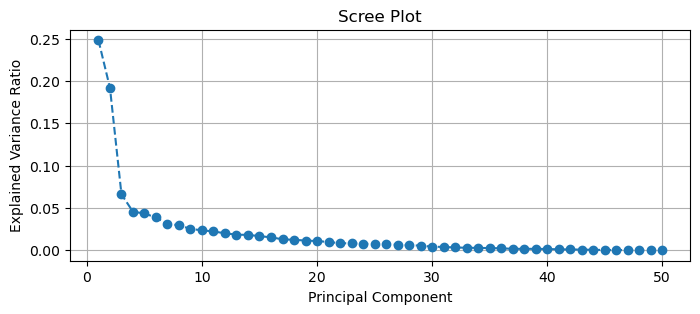

In [29]:
#Plot PCA scree plot
plt.figure(figsize=(8, 3))
plt.plot(
    range(1, len(gajhq_explained_variance) + 1),
    gajhq_explained_variance,
    marker="o",
    linestyle="--",
)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.show()

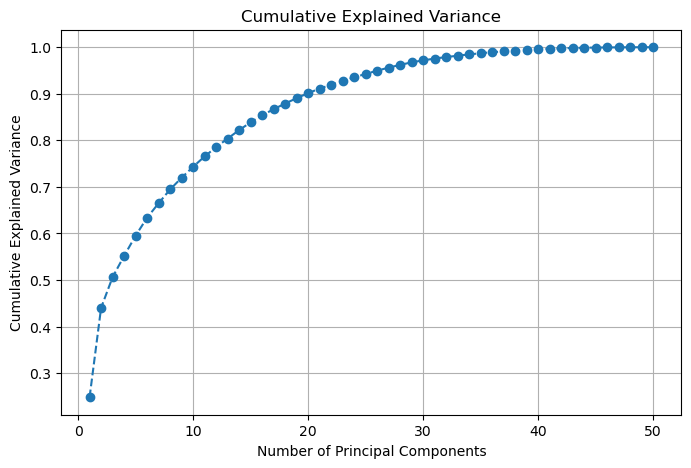

In [47]:
cumulative_variance = gajhq_explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker="o",
    linestyle="--",
)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

PC1: ['Dy', 'Y', 'Yb', 'Sm', 'Er']
PC2: ['Co', 'Sc', 'MgO', 'SiO2', 'CaO']
PC3: ['Sr', 'Li', 'Ce', 'Pr', 'La']
PC4: ['Cr', 'Ni', 'Al2O3', 'Hf', 'Li']
PC5: ['Sb', 'LOI', 'TiO2', 'Li', 'Ce']


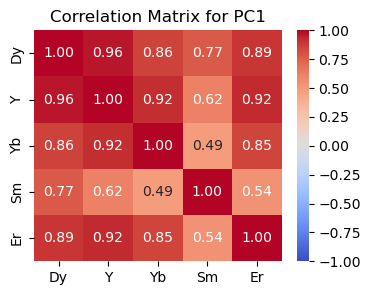

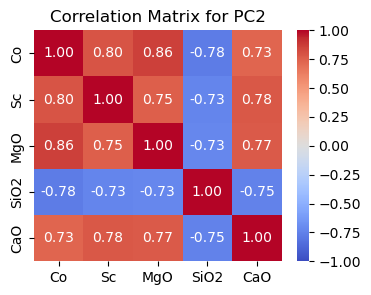

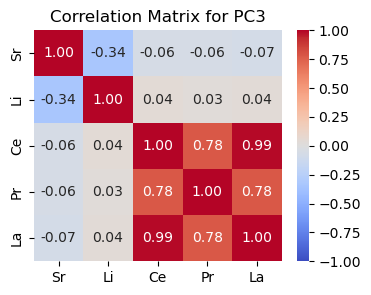

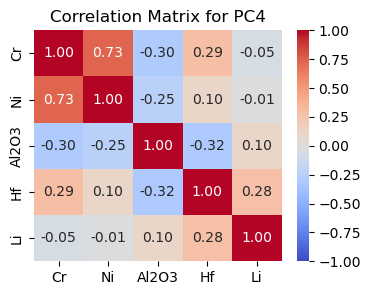

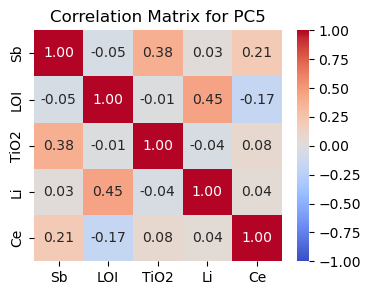

In [30]:
### Extract top features per PC

# Set parameters
num_pcs = 5  # Number of PCs to analyze
top_features_per_pc = 5  # Number of top features to extract per PC

# Prepare lists for groups of features
groups = {}

# Iterate through each PC and extract top features
for pc_index in range(num_pcs):
    # Extract feature contributions for the current PC
    contributions = pd.DataFrame(
        {
            "Feature": gajhq_data_pca.columns,
            f"PC{pc_index + 1} Contribution": np.abs(pca.components_[pc_index]),
        }
    )
    # Sort by contribution and select top features
    top_features = contributions.nlargest(
        top_features_per_pc, f"PC{pc_index + 1} Contribution"
    )["Feature"].tolist()
    groups[f"PC{pc_index + 1}"] = top_features

# Display groups of correlated features
for pc, features in groups.items():
    print(f"{pc}: {features}")

# Plot correlation matrices for each PC group
for pc, features in groups.items():
    plt.figure(figsize=(4, 3))
    corr_matrix = gajhq_data_pca[features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
    plt.title(f"Correlation Matrix for {pc}")
    plt.show()

c:\Users\TyHow\anaconda3\envs\conda_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


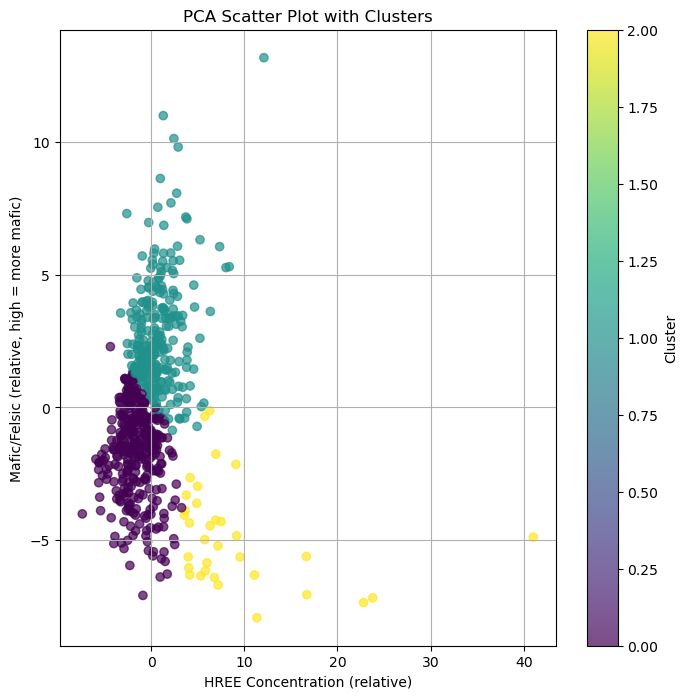

In [38]:
# Perform clustering on the PCA results (e.g., using the first 2 PCs)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df[["PC1", "PC2"]])

# Add cluster labels to the PCA DataFrame
pca_df["Cluster"] = clusters

# Visualize clusters on the PCA scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(
    pca_df["PC1"], pca_df["PC2"], c=pca_df["Cluster"], cmap="viridis", alpha=0.7
)
plt.title("PCA Scatter Plot with Clusters")
plt.xlabel("HREE Concentration (relative)")
plt.ylabel("Mafic/Felsic (relative, high = more mafic)")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()

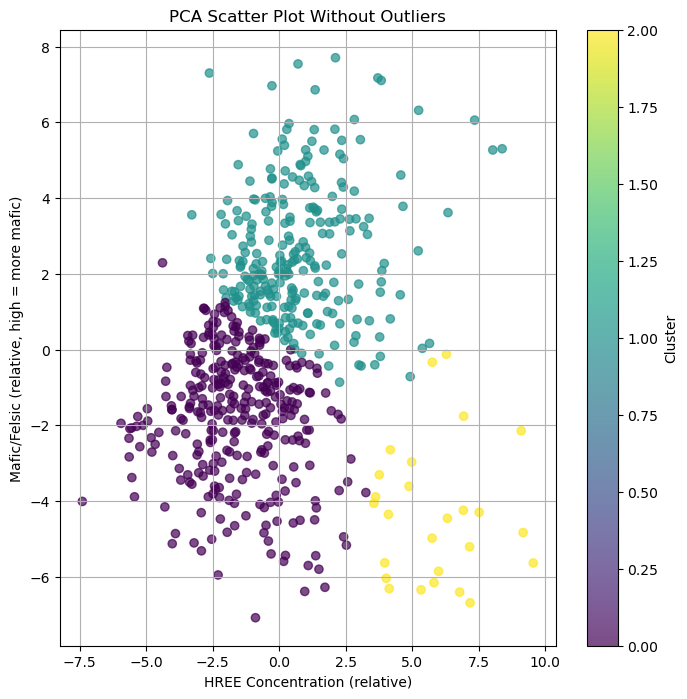

In [39]:
# Define thresholds for PC1 (HREE concentration) and PC2 (mafic/felsic)
pc1_threshold = 10  # Keep samples with PC1 < 10
pc2_threshold = 8  # Keep samples with PC2 < 8

# Filter out outliers
filtered_data = pca_df[
    (pca_df["PC1"] < pc1_threshold) & (pca_df["PC2"] < pc2_threshold)
]

# Replot without outliers
plt.figure(figsize=(8, 8))
plt.scatter(
    filtered_data["PC1"],
    filtered_data["PC2"],
    c=filtered_data["Cluster"],
    cmap="viridis",
    alpha=0.7,
)
plt.colorbar(label="Cluster")
plt.title("PCA Scatter Plot Without Outliers")
plt.xlabel("HREE Concentration (relative)")
plt.ylabel("Mafic/Felsic (relative, high = more mafic)")
plt.grid()
plt.show()